# HW01
# Student: Pravilov Mikhail

In [12]:
import numpy as np
global_random_seed = 4526
np.random.seed(global_random_seed)

# kNN

1. (8 points) Implement the kNN algorithm and calculate Leave-one-out error on both datasets for 1 to 10 neighbors.

Firsly, let's load our dataset.

In [13]:
import pandas as pd
dataset_root="../Datasets/"

In [14]:
# spam.csv loading
spam_path = dataset_root + 'spam.csv'
spam_data = pd.read_csv(spam_path)
spam_data = spam_data.values
spam_X = spam_data[:, 0:-1].astype('float64')
spam_y = spam_data[:, -1]
print("spam datapoints shape: " + str(spam_X.shape))
print("spam labels shape: " + str(spam_y.shape))

spam datapoints shape: (4601, 57)
spam labels shape: (4601,)


In [15]:
# cancer.csv loading
cancer_path = dataset_root + 'cancer.csv'
cancer_data = pd.read_csv(cancer_path)
cancer_data = cancer_data.values
cancer_X = cancer_data[:, 1:].astype('float64')
cancer_y = cancer_data[:, 0]
print("cancer datapoints shape: " + str(cancer_X.shape))
print("cancer labels shape: " + str(cancer_y.shape))

cancer datapoints shape: (569, 30)
cancer labels shape: (569,)


Then let's see what sklearn gives us. This will be a baseline to check that our implementation of kNN is correct.

In [16]:
from sklearn.model_selection import LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
k_global = 10
kNNs = [KNeighborsClassifier(n_neighbors=i) for i in range(1, k_global + 1)]

Leave one out error is N-fold cross validation, where N is the number of datapoints

In [17]:
def calculate_loo_error_for_classifiers(classifiers, X, y):
    from sklearn.model_selection import cross_val_score, KFold
    return [1 - cross_val_score(skf, X=X, y=y, cv=KFold(n_splits=y.shape[0]), n_jobs=-1).mean() for skf in classifiers]

In [18]:
# cancer dataset
print("Cancer dataset")
print("<num of neighbours> <loo error>")
cancer_sklearn_loo = calculate_loo_error_for_classifiers(kNNs, cancer_X, cancer_y)
for k, loo_error in enumerate(cancer_sklearn_loo):
    print(str(k + 1) + " " + str(loo_error))

Cancer dataset
<num of neighbours> <loo error>
1 0.08435852372583474
2 0.0773286467486819
3 0.07381370826010547
4 0.07381370826010547
5 0.06678383128295251
6 0.07029876977152905
7 0.06854130052724072
8 0.07029876977152905
9 0.06678383128295251
10 0.07029876977152905


In [177]:
# spam dataset
print("Spam dataset")
print("<num of neighbours> <loo error>")
spam_sklearn_loo = calculate_loo_error_for_classifiers(kNNs, spam_X, spam_y)
for k, loo_error in enumerate(spam_sklearn_loo):
    print(str(k + 1) + " " + str(loo_error))

Spam dataset
<num of neighbours> <loo error>


KeyboardInterrupt: 

Now let's write our own kNN method.

In [178]:
def get_nearest(k, point_index, X):
    return np.argsort(np.array([np.linalg.norm(X[point_index]-x) for x in X]))[1:k + 1]

def generate_nearest(X, k):
    return np.array([get_nearest(k, i, X) for i in range(X.shape[0])])

def get_class(point_index, nearest_matrix, y, k):
    (nearest_classes, counts) = np.unique(y[nearest_matrix[point_index]][:k], return_counts=True)
    majority_index = np.argmax(counts) 
    return nearest_classes[majority_index]    

In [179]:
def leave_one_out(nearest_matrix, y, k):
    return np.mean([get_class(y_index, nearest_matrix, y, k) != y[y_index] for y_index in range(y.shape[0])])

def leave_one_out_for_all_before_k(X, y, k):
    nearest_matrix = generate_nearest(X, k)
    return [leave_one_out(nearest_matrix, y, i) for i in range(1, k + 1)]

In [180]:
# cancer dataset
print("Cancer dataset")
print("<num of neighbours> <loo error>") 
cancer_loo = leave_one_out_for_all_before_k(cancer_X, cancer_y, k_global)
for k, loo_error in enumerate(cancer_loo):
    print(str(k + 1) + " " + str(loo_error))

Cancer dataset
<num of neighbours> <loo error>
1 0.0843585237258348
2 0.0773286467486819
3 0.07381370826010544
4 0.07381370826010544
5 0.06678383128295255
6 0.070298769771529
7 0.06854130052724078
8 0.070298769771529
9 0.06678383128295255
10 0.070298769771529


In [158]:
# spam dataset
print("Spam dataset")
print("<num of neighbours> <loo error>") 
spam_loo = leave_one_out_for_all_before_k(spam_X, spam_y, k_global)
for k, loo_error in enumerate(spam_loo):
    print(str(k + 1) + " " + str(loo_error))

Spam dataset
<num of neighbours> <loo error>
1 0.16865898717670072
2 0.19039339274070854
3 0.18452510323842644
4 0.19213214518582916
5 0.18539447946098675
6 0.199956531188872
7 0.1958269941317105
8 0.2010432514670724
9 0.20256465985655292
10 0.2019126276896327


In [181]:
print("Cancer dataset. my - sklearn")
print(np.array(cancer_sklearn_loo) - np.array(cancer_loo))

Cancer dataset. my - sklearn
[-5.55111512e-17  0.00000000e+00  2.77555756e-17  2.77555756e-17
 -4.16333634e-17  4.16333634e-17 -5.55111512e-17  4.16333634e-17
 -4.16333634e-17  4.16333634e-17]


In [163]:
print("Spam dataset. my - sklearn")
print(np.array(spam_sklearn_loo) - np.array(spam_loo))

Spam dataset. my - sklearn
[ 8.69376223e-04  2.17344056e-04  8.69376223e-04  8.69376223e-04
  4.34688111e-04  4.34688111e-04 -5.55111512e-17 -2.77555756e-17
  2.17344056e-04  2.17344056e-04]


As you can see, the error is small for the cancer dataset. For spam dataset it is bigger, but I think it is acceptable and does not mean that there is a mistake in my implementation. This is connected probably with the fact that spam dataset is larger and accumulates the error in the distance computations. It is also likely that in the spam dataset classes are quite close to each other, hence more errors in the selection of k neighbors.

In [12]:
cancer_best_k = np.argmin(cancer_loo) + 1
print("Best k for cancer dataset is " + str(cancer_best_k) + " with loo error = " + str(cancer_loo[cancer_best_k - 1]))

Best k for cancer dataset is 5 with loo error = 0.06678383128295255


In [167]:
spam_best_k = np.argmin(spam_loo) + 1
print("Best k for spam dataset is " + str(spam_best_k) + " with loo error = " + str(spam_loo[spam_best_k - 1]))

Best k for spam dataset is 1 with loo error = 0.16865898717670072


If classes are often close to each other then taking big k most likely is bad idea. In the spam dataset this case occurs and best k = 1.

"(2) Scale all features with MinMax scaler to [0,1] and calculate Leave-one-out error on both datasets for 1 to 10 neighbors."

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

def scale_min_max(X, min_val=0, max_val=1):
    return ((X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))) * (max_val - min_val) + min_val

In [43]:
cancer_scaled_X = scale_min_max(cancer_X)
scaler.fit(cancer_X)
cancer_sklearn_scaled_X = scaler.transform(cancer_X)
max_diff = np.max(np.abs(cancer_scaled_X - cancer_sklearn_scaled_X))
print("Max diff in features between my and sklearn implementation " + str(max_diff))

Max diff in features between my and sklearn implementation 2.220446049250313e-16


In [44]:
spam_scaled_X = scale_min_max(spam_X)
scaler.fit(spam_X)
spam_sklearn_scaled_X = scaler.transform(spam_X)
max_diff = np.max(np.abs(spam_scaled_X - spam_sklearn_scaled_X))
print("Max diff in features between my and sklearn implementation " + str(max_diff))

Max diff in features between my and sklearn implementation 1.1102230246251565e-16


Scaler implemented correctly because $10^{-16}$ it is the highest precision of float64.

In [45]:
# cancer dataset
print("Cancer dataset")
print("<num of neighbours> <loo error>") 
cancer_scaled_loo = leave_one_out_for_all_before_k(cancer_scaled_X, cancer_y, k_global)
for k, loo_error in enumerate(cancer_scaled_loo):
    print(str(k + 1) + " " + str(loo_error))

Cancer dataset
<num of neighbours> <loo error>
1 0.04745166959578207
2 0.03866432337434095
3 0.029876977152899824
4 0.028119507908611598
5 0.033391915641476276
6 0.029876977152899824
7 0.029876977152899824
8 0.03163444639718805
9 0.029876977152899824
10 0.029876977152899824


In [189]:
# spam dataset
print("Spam dataset")
print("<num of neighbours> <loo error>") 
spam_scaled_loo = leave_one_out_for_all_before_k(spam_scaled_X, spam_y, k_global)
for k, loo_error in enumerate(spam_scaled_loo):
    print(str(k + 1) + " " + str(loo_error))

Spam dataset
<num of neighbours> <loo error>
1 0.0869376222560313
2 0.10106498587263639
3 0.09497935231471419
4 0.10149967398391654
5 0.09497935231471419
6 0.10258639426211694
7 0.09932623342751576
8 0.10215170615083677
9 0.1019343620951967
10 0.10519452292979788


In [20]:
cancer_scaled_best_k = np.argmin(cancer_scaled_loo) + 1
print("Best k for cancer dataset is " + str(cancer_scaled_best_k) + " with loo error = " + str(cancer_scaled_loo[cancer_scaled_best_k - 1]))

Best k for cancer dataset is 4 with loo error = 0.028119507908611598


In [21]:
spam_scaled_best_k = np.argmin(spam_scaled_loo) + 1
print("Best k for spam dataset is " + str(spam_scaled_best_k) + " with loo error = " + str(spam_scaled_loo[spam_scaled_best_k - 1]))

NameError: name 'spam_scaled_loo' is not defined

We can see that results after scaling are better approximately in 2 times.

# Clustering
Dataset is blobs.csv.

The results should be presented as drawn clusters.

In [21]:
# blobs.csv loading
blobs_path = dataset_root + 'blobs.csv'
blobs_data = pd.read_csv(blobs_path)
blobs_X = blobs_data.values.astype('float64')
print("blobs data shape: " + str(blobs_X.shape))

blobs data shape: (400, 2)


3. (2) Implement the k-means algorithm and cluster data point into [2,3,4,5] clusters.

In [22]:
import matplotlib.pyplot as plt

def draw_clusters(X, centroids, predictor):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = predictor(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')

    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=169, linewidths=3,
                color='w', zorder=10)
    plt.title('Clusters')
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [23]:
k_clusters = [2, 3, 4, 5]
np.random.seed(global_random_seed)
initial_centers = [np.random.randn(k, 2) for k in k_clusters]
print("Initial centers for k=2: " + str(initial_centers[0]))

Initial centers for k=2: [[ 0.53175494 -1.55292708]
 [ 0.29192415  0.74265215]]


Again let's start with getting familiar with sklearn implementation. To check in future that we've implemented all correctly.

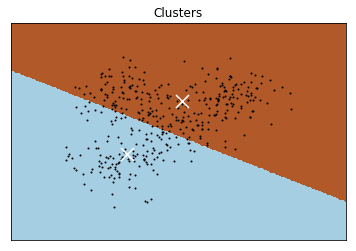

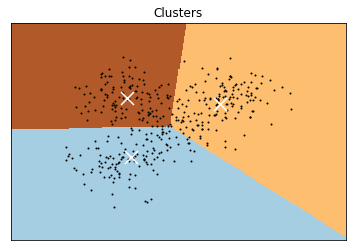

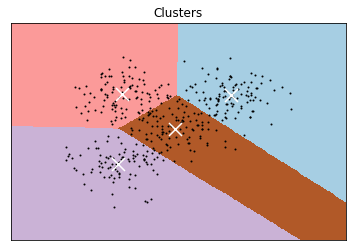

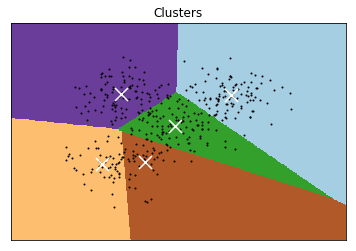

In [24]:
from sklearn.cluster import KMeans

for initial_center in initial_centers:
    kmeans = KMeans(n_clusters=initial_center.shape[0], init=initial_center, 
                   n_init=1, random_state=0, n_jobs=-1).fit(blobs_X)
    draw_clusters(blobs_X, kmeans.cluster_centers_, kmeans.predict)

In [25]:
class my_KMeans:
    def __init__(self, n_clusters, init):
        self.n_clusters = n_clusters
        self.cluster_centers_ = np.copy(init)
    
    def predict(self, X):
        return np.argmin(np.sum((X[None,:,:] - self.cluster_centers_[:,None,:]) ** 2, axis=-1), axis=0)
    
    def fit(self, X):
        prev_cluster_centers = np.zeros(self.cluster_centers_.shape)
        while not np.allclose(prev_cluster_centers, self.cluster_centers_):
            prev_cluster_centers = np.copy(self.cluster_centers_)
            nearest_centers = self.predict(X)
            for i in range(self.cluster_centers_.shape[0]):
                nearest_to_i = X[nearest_centers == i]
                if nearest_to_i.size == 0:
                    continue
                self.cluster_centers_[i] = np.mean(nearest_to_i, axis=0)

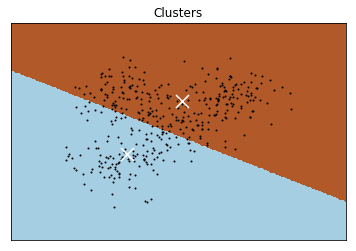

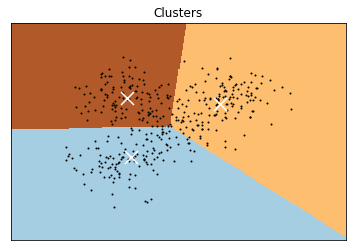

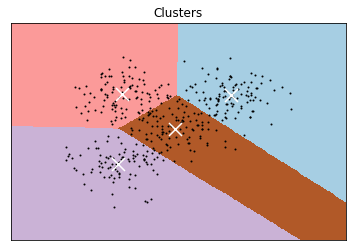

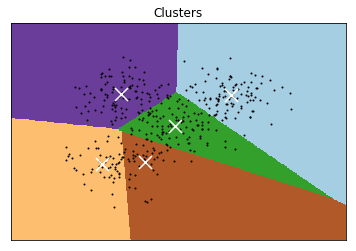

In [26]:
for initial_center in initial_centers:
    kmeans = my_KMeans(n_clusters=initial_center.shape[0], init=initial_center)
    kmeans.fit(blobs_X)
    draw_clusters(blobs_X, kmeans.cluster_centers_, kmeans.predict)

As we can see results are identical. It is kinda hard to say based on plots which clustering is better.

"4. (2) Implement the DBSCAN algorithm and find parameters for clustering into [2,3,4,5] clusters."

Again let's strart with sklearn implementation and draw a plot. Plot will a little bit different. 

In [27]:
import matplotlib.pyplot as plt

def draw_DBSCAN_plot(X, labels, core_samples_mask):
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = (labels == k)

        xy = X[class_member_mask & core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=14)

        xy = X[class_member_mask & ~core_samples_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)
    plt.title('DBSCAN clusters with ' + str(n_clusters) + " clusters and with " + str(n_noise) + " noises")
    plt.show()

In [28]:
from sklearn.cluster import DBSCAN

def find_params_for_clusters(X, k, eps_range=np.arange(0.1, 1, 0.1), min_samples_range=np.arange(10, 20)):
    for eps in eps_range:
        for min_samples in min_samples_range:
            db = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            n_clusters = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)
            if n_clusters == k:
                return eps, min_samples
    return None
cluster_params = [find_params_for_clusters(blobs_X, k) for k in k_clusters]
print("Params for " + str(k_clusters) + " cluster:" + str(cluster_params))

Params for [2, 3, 4, 5] cluster:[(0.30000000000000004, 15), (0.2, 13), (0.2, 12), (0.2, 11)]


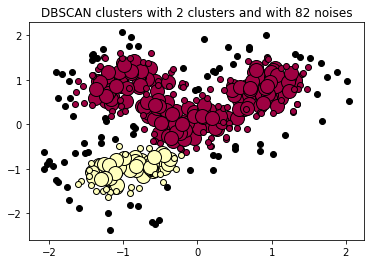

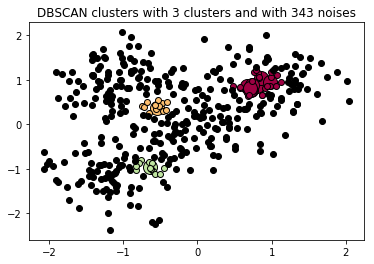

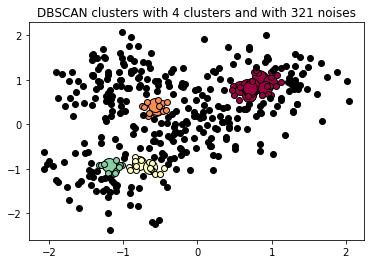

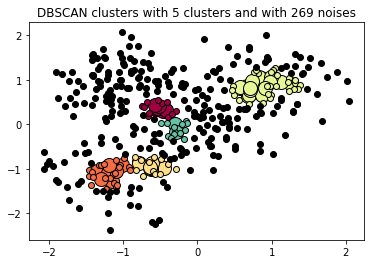

In [29]:
def draw_sklearn_DBSCAN(X, db):
    db.fit(X)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    draw_DBSCAN_plot(X, db.labels_, core_samples_mask)    

for cluster_param in cluster_params:
    draw_sklearn_DBSCAN(blobs_X, DBSCAN(eps=cluster_param[0], min_samples=cluster_param[1]))

Now let's implement it ourselfs. 

In [30]:
def get_nearest_in_radious(eps, point_index, X):
    mask = np.array([np.linalg.norm(X[point_index]-x) for x in X]) <= eps
    return [i for i in range(mask.shape[0]) if mask[i] == True]

class my_DBSCAN:
    # min_samples includes point itself
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples
        self.labels_ = None
        self.core_sample_indices_ = []
        
    def fit(self, X):
        self.labels_ = np.zeros(X.shape[0])
        C = 0
        for point_id in range(X.shape[0]):
            if self.labels_[point_id] != 0:
                continue
            neighbors_indices = get_nearest_in_radious(self.eps, point_id, X)
            if len(neighbors_indices) < self.min_samples:
                self.labels_[point_id] = -1
                continue
            C = C + 1
            self.core_sample_indices_.append(point_id)
            self.labels_[point_id] = C
            S = neighbors_indices
            S.remove(point_id)
            for q in S:
                if self.labels_[q] == -1:
                    self.labels_[q] = C
                if self.labels_[q] != 0:
                    continue
                self.labels_[q] = C
                neighbors_indices = get_nearest_in_radious(self.eps, q, X)
                if len(neighbors_indices) >= self.min_samples:
                    self.core_sample_indices_.append(q)
                    N_not_in_S = [i for i in neighbors_indices if i not in S]
                    S += N_not_in_S

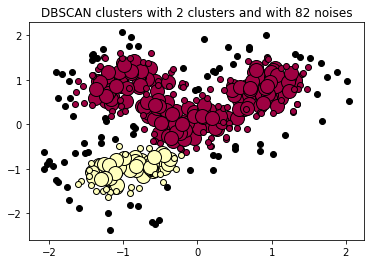

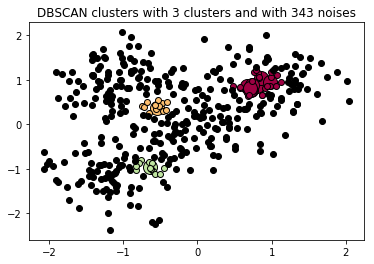

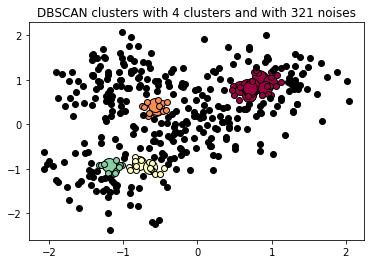

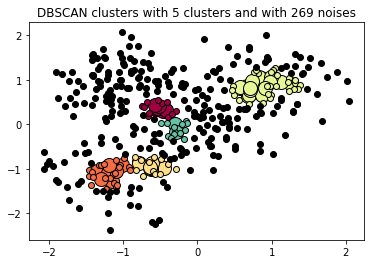

In [31]:
for cluster_param in cluster_params:
    draw_sklearn_DBSCAN(blobs_X, my_DBSCAN(eps=cluster_param[0], min_samples=cluster_param[1]))

Plots seem to be equal.

Now let's check that labels and cluster centers are equal. These two values define uniquely clustering.

In [32]:
for cluster_param in cluster_params:
    my = my_DBSCAN(eps=cluster_param[0], min_samples=cluster_param[1])
    my.fit(blobs_X)
    sklearn = DBSCAN(eps=cluster_param[0], min_samples=cluster_param[1])
    sklearn.fit(blobs_X)
    # transormation is needed, because my labels for clusters start with 1 not with 0.
    my_labels = np.copy(my.labels_)
    my_labels -= 1
    my_labels[my_labels == -2] += 1
    assert np.all(my_labels == sklearn.labels_)
    assert np.all(np.sort(my.core_sample_indices_) == sklearn.core_sample_indices_)
print("Asserts are true. Clusters are identical.")

Asserts are true. Clusters are identical.


"5. (3) Implement the Agglomerative Clustering and output the clustering into [2,3,4,5] clusters."

Let's choose as linkage criteria complete clustering. Because it is easy to implement and shows good results in some cases.

In [33]:
import matplotlib.pyplot as plt

def draw_agg_plot(X, labels):
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each)
              for each in np.linspace(0, 1, len(unique_labels))]
    for k, col in zip(unique_labels, colors):
        class_member_mask = (labels == k)

        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=6)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    plt.title('Agglomerative complete clustering with ' + str(n_clusters) + " clusters")
    plt.show()

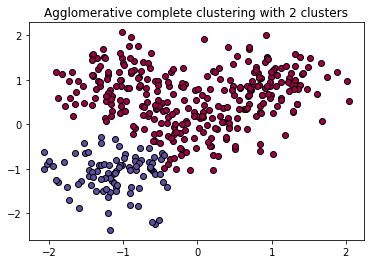

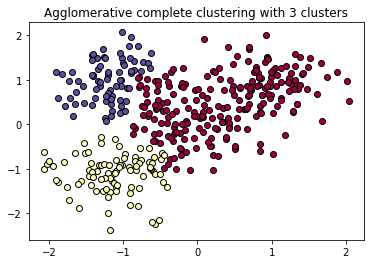

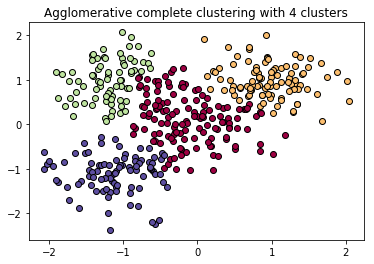

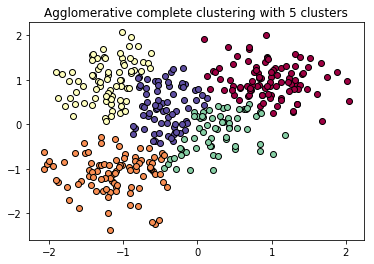

In [34]:
from sklearn.cluster import AgglomerativeClustering
sklearn_agglomerative_clusters = [AgglomerativeClustering(linkage='complete', n_clusters=k).fit(blobs_X) for k in k_clusters]
for cluster in sklearn_agglomerative_clusters:
    draw_agg_plot(blobs_X, cluster.labels_)

Now let's implement our own agglomerative clustering with complete linkage criteria.

In [35]:
class My_agglomerative_complete_clustering:
    def __init__(self, n_clusters):
        self.n_clusters = n_clusters
        self.labels_ = None
    
    def fit(self, X):
        from scipy.spatial import distance_matrix
        dist = distance_matrix(X, X)
        self.labels_ = np.arange(dist.shape[0])
        cluster_number = np.array([i for i in range(dist.shape[0])])
        C = dist.shape[0]
        while dist.shape[0] != self.n_clusters:
            max_ind = np.unravel_index(np.argsort(dist, axis=None)[dist.shape[0]], dist.shape)
            fc_mask = self.labels_ == cluster_number[max_ind[0]]  
            sc_mask = self.labels_ == cluster_number[max_ind[1]]
            self.labels_[fc_mask] = C
            self.labels_[sc_mask] = C
            cluster_number = np.delete(cluster_number, np.s_[max_ind[0], max_ind[1]])
            cluster_number = np.hstack((cluster_number, np.array([C])))
            dist = np.delete(dist, (max_ind[0], max_ind[1]), axis=1)
            new_row = np.max(dist[[max_ind[0], max_ind[1]]], axis=0)
            dist = np.delete(dist, (max_ind[0], max_ind[1]), axis=0)
            dist = np.vstack((dist, new_row))
            new_col = np.hstack((new_row, np.array([0]))).reshape(-1, 1)
            dist = np.hstack((dist, new_col))
            C = C + 1

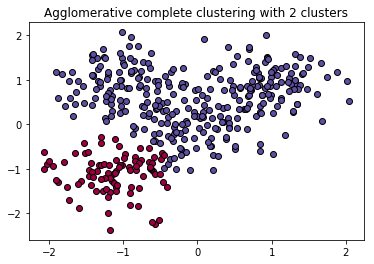

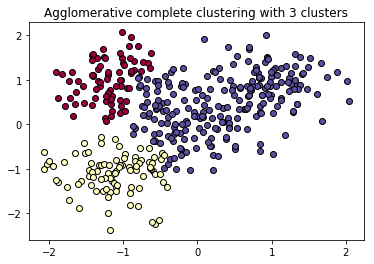

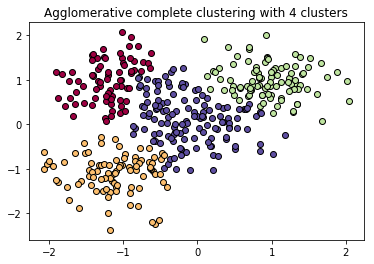

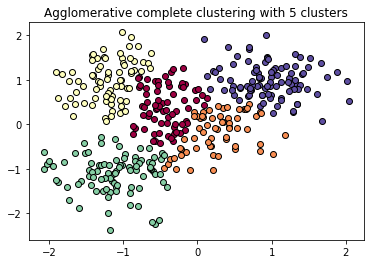

In [36]:
sklearn_agglomerative_clusters = [My_agglomerative_complete_clustering(n_clusters=k) for k in k_clusters]
for cluster in sklearn_agglomerative_clusters:
    cluster.fit(blobs_X)
    draw_agg_plot(blobs_X, cluster.labels_)

As we can see results seem to be equal.

"6. (2) Cluster datapoints into [2,3,5,10] clusters with k-Means and calculate the Purity metric."

In [37]:
np.random.seed(global_random_seed)
initial_centers_cancer = [np.random.randn(k, cancer_X.shape[1]) for k in k_clusters + [10]]
print("Shape of initial centers for cancer dataset for k=10: " + str(initial_centers_cancer[-1].shape))

Shape of initial centers for cancer dataset for k=10: (10, 30)


In [38]:
from sklearn import metrics

def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [39]:
for initial_center in initial_centers_cancer:
    kmeans = my_KMeans(n_clusters=initial_center.shape[0], init=initial_center)
    kmeans.fit(cancer_X)
    purity = purity_score(cancer_y, kmeans.predict(cancer_X))
    print("k = " + str(initial_center.shape[0]) + " purity = " + str(purity))

k = 2 purity = 0.8541300527240774
k = 3 purity = 0.8875219683655536
k = 4 purity = 0.8347978910369068
k = 5 purity = 0.8910369068541301
k = 10 purity = 0.8910369068541301


Rules and curves

Datasets are spam.csv and cancer.csv.

"7. (2) Calculate ROC-AUC for threshold rules for every feature for both datasets. Draw ROC curves for the best three in both."

sklearn takes scores in range from 0 to 1, so we can use our MinMax scaled features. This won't change the result because the order of datapoints specific features doesn't change.

In [46]:
def draw_roc_curve(fpr, tpr, title):
    plt.xlabel("False positive rate")
    plt.ylabel("True positive rate")
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1])
    plt.title('ROC. ' + title)
    plt.show()

Auc score for cancer: [0.93751652 0.77582448 0.94689763 0.93831589 0.72204165 0.86378231
 0.93782702 0.96443766 0.69856244 0.48453438 0.86833413 0.51159426
 0.87639395 0.92641113 0.46883754 0.72728053 0.78081893 0.79179219
 0.44488928 0.62030284 0.97044289 0.78463083 0.97545056 0.9698285
 0.75405634 0.86230247 0.92136383 0.96670366 0.73693912 0.68597061]


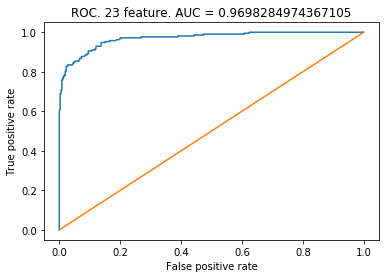

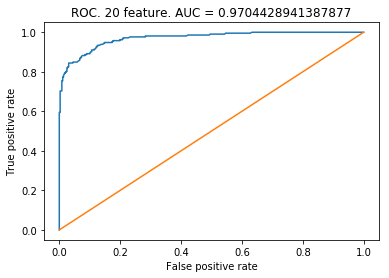

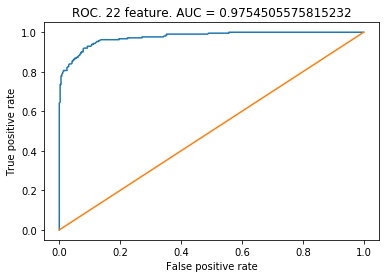

In [47]:
import numpy as np
from sklearn.metrics import roc_curve, roc_auc_score

# cancer
cancer_auc_scores = np.zeros(cancer_scaled_X.shape[1])
for i in range(cancer_scaled_X.shape[1]):
    feature = cancer_scaled_X[:, i].reshape(1, -1)[0]
    cancer_auc_scores[i] = roc_auc_score(cancer_y, feature)
print("Auc score for cancer: "+ str(cancer_auc_scores))
    
three_best_features_indices = np.argsort(cancer_auc_scores)[-3:]
three_best_features = cancer_scaled_X[:, three_best_features_indices]
for i in range(3):
    fpr, tpr, _ = roc_curve(cancer_y, three_best_features[:, i], pos_label='M')
    draw_roc_curve(fpr, tpr, str(three_best_features_indices[i]) + " feature. AUC = " + str(cancer_auc_scores[three_best_features_indices[i]]))

Auc score for spam: [0.60463239 0.62160144 0.67531423 0.50934022 0.71093246 0.6357693
 0.70313033 0.6357601  0.61569875 0.63933385 0.63174785 0.58223467
 0.58520254 0.54104483 0.57065997 0.73272846 0.64825287 0.62931366
 0.71046814 0.59609717 0.78016592 0.52222788 0.65518966 0.67789759
 0.32393528 0.36586494 0.36333212 0.43024128 0.43836777 0.42375378
 0.4488233  0.4641313  0.45425543 0.46585882 0.43257676 0.44237843
 0.39679788 0.49965606 0.45828519 0.50859151 0.47390004 0.44748067
 0.46977938 0.46196448 0.46623096 0.43617918 0.49730456 0.4707748
 0.47793841 0.48139582 0.46360476 0.82904612 0.77213944 0.60132771
 0.78820042 0.80416257 0.76228009]


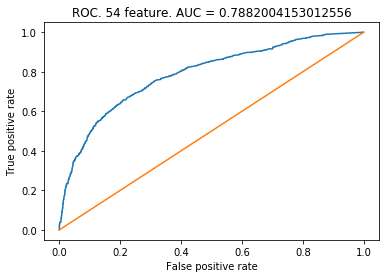

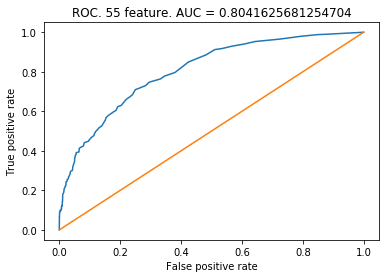

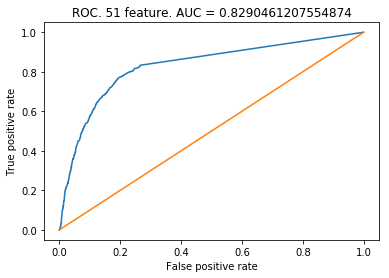

In [48]:
# spam
spam_auc_scores = np.zeros(spam_scaled_X.shape[1])
for i in range(spam_scaled_X.shape[1]):
    feature = spam_scaled_X[:, i].reshape(1, -1)[0]
    spam_auc_scores[i] = roc_auc_score(spam_y, feature)
print("Auc score for spam: "+ str(spam_auc_scores))

three_best_features_indices = np.argsort(spam_auc_scores)[-3:]
three_best_features = spam_scaled_X[:, three_best_features_indices]
for i in range(3):
    fpr, tpr, _ = roc_curve(spam_y, three_best_features[:, i], pos_label=1)
    draw_roc_curve(fpr, tpr, str(three_best_features_indices[i]) + " feature. AUC = " + str(spam_auc_scores[three_best_features_indices[i]]))

Validation

Datasets are spam.csv and cancer.csv.

"8. (1) Split the dataset into training and validation datasets (80%/20%). Print out the proportions of classes in all datasets."

In [49]:
from sklearn.model_selection import train_test_split
test_size=0.2
def draw_proportion_of_classes(y_train, y_test, dataset):
    import numpy as np
    import matplotlib.pyplot as plt
    unique_train, counts_train = np.unique(y_train, return_counts=True)
    unique_test, counts_test = np.unique(y_test, return_counts=True)
    n_groups = max(unique_train.shape[0], unique_test.shape[0])
    print("Proportions are: " + str(dict(zip(unique_train, counts_test / (counts_test + counts_train)))))
    fig, ax = plt.subplots()
    index = np.arange(n_groups)
    bar_width = 0.35
    opacity = 0.8

    rects1 = plt.bar(index, counts_train, bar_width, alpha=opacity, color='b', label='Train')
    rects2 = plt.bar(index + bar_width, counts_test, bar_width, alpha=opacity, color='g', label='Test')

    plt.xlabel('Labels')
    plt.ylabel('Amount')
    plt.title('Number of each labels in train and test for ' + dataset)
    plt.xticks(index + bar_width / 2, unique_test)
    plt.legend()

    plt.tight_layout()
    plt.show()

Proportions are: {'B': 0.20168067226890757, 'M': 0.19811320754716982}


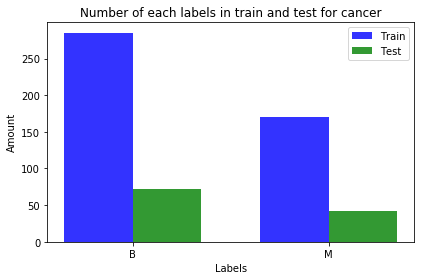

In [50]:
np.random.seed(global_random_seed)
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(cancer_X, cancer_y,
                                                    stratify=cancer_y,
                                                    random_state=global_random_seed,
                                                    test_size=test_size)
draw_proportion_of_classes(y_train_cancer, y_test_cancer, "cancer")

Proportions are: {0.0: 0.20014347202295552, 1.0: 0.20022062879205738}


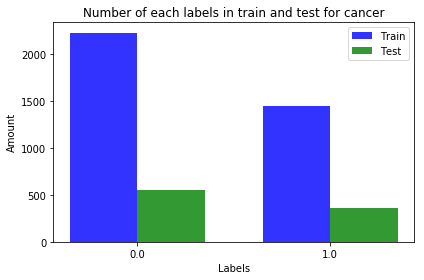

In [51]:
np.random.seed(global_random_seed)
X_train_spam, X_test_spam, y_train_spam, y_test_spam = train_test_split(spam_X, spam_y,
                                                    stratify=spam_y,
                                                    random_state=global_random_seed,
                                                    test_size=test_size)
draw_proportion_of_classes(y_train_spam, y_test_spam, "cancer")

In scale without considering the values on y axis plots are identical. And it is good and expected because we used stratified split. And because it is stratified proportions of all two classes are close to 20. Here proportion = test / (test + train)

Trees

Datasets are spam.csv and cancer.csv.

"9. (5) Implement a tree algorithm with Gini Impurity criterion. Find the best depth (from 1 to 10) on the validation dataset. Draw ROC curves for thresholds on class probabilities."

Again let's start with sklearn workflow and use it as a baseline.

In [345]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
np.random.seed(global_random_seed)
depth_range = range(1, 11)
depth_clfs = [DecisionTreeClassifier(criterion="gini", max_depth=d, max_features=1, random_state=global_random_seed) for d in depth_range]

We draw ROC curve only for positive class, because for negative probabilities this curve will just a reflected one for positive class.

Cancer case
[0.87719298 0.90350877 0.93859649 0.90350877 0.92105263 0.92982456
 0.88596491 0.93859649 0.92982456 0.92982456]
Best is depth = 3 with accuracy = 0.9385964912280702


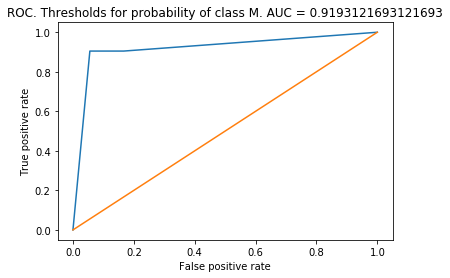

In [346]:
# cancer
print("Cancer case")
best_acc = -1
accuracies = np.zeros(len(depth_clfs))
for i, clf in enumerate(depth_clfs):
    clf.fit(X_train_cancer, y_train_cancer)
    accuracies[i] = accuracy_score(y_test_cancer, clf.predict(X_test_cancer))
print(accuracies)
best_clf_index = np.argmax(accuracies)
print('Best is depth = ' + str(best_clf_index + 1) + ' with accuracy = ' + str(np.max(accuracies)))
predicted = clf.predict_proba(X_test_cancer)
fpr, tpr, _ = roc_curve(y_test_cancer, predicted[:, 1], pos_label='M') # all or only test?
draw_roc_curve(fpr, tpr, "Thresholds for probability of class M. AUC = " + str(roc_auc_score(y_test_cancer, predicted[:, 1])))

Spam case
[0.60586319 0.75352877 0.76004343 0.75787188 0.76764387 0.80456026
 0.81324647 0.80781759 0.80564604 0.82953312]
Best is depth = 10 with accuracy = 0.8295331161780674


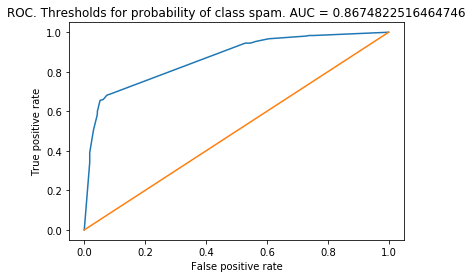

In [169]:
# spam
print("Spam case")
best_acc = -1
accuracies = np.zeros(len(depth_clfs))
for i, clf in enumerate(depth_clfs):
    clf.fit(X_train_spam, y_train_spam)
    accuracies[i] = accuracy_score(y_test_spam, clf.predict(X_test_spam))
print(accuracies)
best_clf_index = np.argmax(accuracies)
print('Best is depth = ' + str(best_clf_index + 1) + ' with accuracy = ' + str(np.max(accuracies)))
predicted = clf.predict_proba(X_test_spam)
fpr, tpr, _ = roc_curve(y_test_spam, predicted[:, 1], pos_label=1) # all or only test?
draw_roc_curve(fpr, tpr, "Thresholds for probability of class spam. AUC = " + str(roc_auc_score(y_test_spam, predicted[:, 1])))

Looks like spam dataset is more comlex and requires larger depth.

Now let's implement it ourselfs.

In [328]:
def gini_impurity(masks, y):
    n_instances = y.shape[0]
    gini = 0.0
    for mask in masks:
        size = np.sum(mask)
        if size == 0:
            continue
        score = 0.0
        classes, counts = np.unique(y[mask], return_counts=True)
        score = np.sum(counts ** 2) / size ** 2
        gini += (1.0 - score) * (size / n_instances)
    return gini

def is_one_class(points_mask, y):
    return np.unique(y[points_mask]).shape[0] == 1

def get_proba_classes(points_mask, y, y_original):
    classes, counts = np.unique(y[points_mask], return_counts=True)
    classes_all = np.unique(y_original)
    sorted_args = np.argsort(classes) 
    res_inter = np.array(counts[sorted_args] / np.sum(counts))
    sorted_args_all = np.argsort(classes_all)
    k = 0
    res = np.zeros(classes_all.shape[0])
    for i in range(sorted_args_all.shape[0]):
        if k < classes.shape[0] and classes[k] == classes_all[i]:
            res[i] = res_inter[k]
            k += 1
    return res
    
class Node:
    def __init__(self, depth, left=None, right=None, feature_index=None, value=None, proba=None):
        self.left = left
        self.rigth = right
        self.feature_index = feature_index
        self.value = value
        self.depth = depth
        self.proba = proba
    
    def predict_proba(self, mask, X):
        if not np.any(mask):
            return None
        if self.proba is not None:
            return np.array([self.proba,]*np.sum(mask))
        l = self.left.predict_proba(X[mask, self.feature_index] < self.value, X[mask])
        r = self.right.predict_proba(X[mask, self.feature_index] >= self.value, X[mask])
        if l is None:
            assert(r is not None)
            return r
        elif r is None:
            assert(l is not None)
            return l
        else:
            return np.vstack((l, r))

def get_split(points_mask, X, y):
    arr_shape = (np.sum(points_mask), X.shape[1])
    gini_impurities = np.zeros(arr_shape)
    return_values = np.empty(arr_shape, dtype=object)
    true_args = np.argwhere(points_mask==True).reshape(1, -1)[0]
    for i in range(arr_shape[0]):
        for feature_id in range(arr_shape[1]):
            value = X[true_args[i]][feature_id]
            left_mask = X[points_mask, feature_id] < value
            right_mask = X[points_mask, feature_id] >= value
            gini_impurities[i][feature_id] = gini_impurity([left_mask, right_mask], y[points_mask])
            return_values[i][feature_id] = (feature_id, value, left_mask, right_mask)
    return return_values[np.unravel_index(np.argmin(gini_impurities, axis=None), gini_impurities.shape)]
        
class my_tree_classifier:
    def __init__(self, max_depth):
        self.max_depth = max_depth
        self.root = Node(depth=0)

    def fit(self, X, y):
        self.y_original = y
        self.split(self.root, np.ones(X.shape[0], dtype=bool), X, y)
    
    def split(self, node, points_mask, X, y):
        if is_one_class(points_mask, y) or node.depth == self.max_depth:
        #if node.depth == self.max_depth:
            node.proba = get_proba_classes(points_mask, y, self.y_original)
            return
        node.feature_index, node.value, left_mask, right_mask = get_split(points_mask, X, y)
        node.left = Node(depth=node.depth + 1)
        node.right = Node(depth=node.depth + 1)
        #if np.any(left_mask):
        self.split(node.left, left_mask, X[points_mask], y[points_mask])
        #if np.any(right_mask):
        self.split(node.right, right_mask, X[points_mask], y[points_mask])
    
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)
        
    def predict_proba(self, X):
        return self.root.predict_proba(np.ones(X.shape[0], dtype=bool), X)

In [329]:
my_depth_clfs = [my_tree_classifier(max_depth=d) for d in depth_range]

Cancer case
['B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M']
0.4824561403508772
['B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B'
 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M']
0.4824561403508772
['M' 'M' 'B' 'B' 'B' '

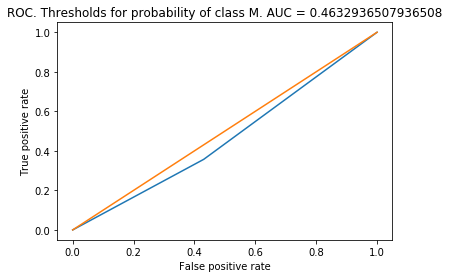

In [330]:
# cancer
print("Cancer case")
best_acc = -1
accuracies = np.zeros(len(my_depth_clfs))
for i, clf in enumerate(my_depth_clfs):
    clf.fit(X_train_cancer, y_train_cancer)
    pred = clf.predict(X_test_cancer).astype('object')
    pred[pred == 0] = 'B'
    pred[pred == 1] = 'M'
    print(pred)
    accuracies[i] = accuracy_score(y_test_cancer, pred)
    print(accuracies[i])
print(accuracies)
best_clf_index = np.argmax(accuracies)
print('Best is depth = ' + str(best_clf_index + 1) + ' with accuracy = ' + str(np.max(accuracies)))
predicted = clf.predict_proba(X_test_cancer)
fpr, tpr, _ = roc_curve(y_test_cancer, predicted[:, 1], pos_label='M') # all or only test?
draw_roc_curve(fpr, tpr, "Thresholds for probability of class M. AUC = " + str(roc_auc_score(y_test_cancer, predicted[:, 1])))

In [300]:
X = np.array([[1, 2],
            [3, 4],
             [5, 6]])

y = np.array([-1, 1, 1])
y[[0, 2]][X[[0, 2], 0] < 4]
proba = np.array([[0.2, 0.3, 0.5],
                  [0.4, 0.3, 0.3]])
np.argmax(proba, axis=1)
#get_proba_classes(np.array([True, True, True]), np.array(['M', 'B', 'M']))
np.vstack((np.empty(2,), X))

array([[1.e-323, 0.e+000],
       [1.e+000, 2.e+000],
       [3.e+000, 4.e+000],
       [5.e+000, 6.e+000]])

In [200]:
X = np.array([[1],
              [1],  
              [1],
              [1]])
mask1 = np.array([True, False, True, False])
mask2 = np.array([False, True, False, True])
print(gini_impurity([mask1, mask2], np.array([1, 1, 0, 0])))
mask1 = np.array([True, True, False, False])
mask2 = np.array([False, False, True, True])
print(gini_impurity([mask1, mask2], np.array([1, 1, 0, 0])))

0.5
0.0


In [301]:
arr = np.array([1, 2],
              )
np.array([arr,]*1)

array([[1, 2]])

In [320]:
# Print a decision tree
def print_tree(node):
    if node.proba is None:
        print('%s[X%d < %.3f]' % ((node.depth*' ', (node.feature_index + 1), node.value)))
        print_tree(node.left)
        print_tree(node.right)
    else:
        print('%s[%s]' % ((node.depth*' ', node.proba)))

t_X = np.array([[2.771244718,1.784783929],
    [1.728571309,1.169761413],
    [3.678319846,2.81281357],
    [3.961043357,2.61995032],
    [2.999208922,2.209014212],
    [7.497545867,3.162953546],
    [9.00220326,3.339047188],
    [7.444542326,0.476683375],
    [10.12493903,3.234550982],
    [6.642287351,3.319983761]])
t_y = np.array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])
tree = my_tree_classifier(2)
tree.fit(t_X, t_y)
print_tree(tree.root)

[False  True False False False]
[0 0 0 0 0]
[ True False  True  True  True]
[0 0 0 0 0]
[False False  True False  True]
[1 1 1 1 1]
[ True  True False  True False]
[1 1 1 1 1]
[X1 < 6.642]
 [X1 < 2.771]
  [[1. 0.]]
  [[1. 0.]]
 [X1 < 7.498]
  [[0. 1.]]
  [[0. 1.]]


In [347]:
# CART on the Bank Note dataset
from random import seed
from random import randrange
from csv import reader
 
# Load a CSV file
def load_csv(filename):
	file = open(filename, "rb")
	lines = reader(file)
	dataset = list(lines)
	return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())
 
# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split
 
# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0
 
# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores
 
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right
 
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
	# count all samples at split point
	n_instances = float(sum([len(group) for group in groups]))
	# sum weighted Gini index for each group
	gini = 0.0
	for group in groups:
		size = float(len(group))
		# avoid divide by zero
		if size == 0:
			continue
		score = 0.0
		# score the group based on the score for each class
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p
		# weight the group score by its relative size
		gini += (1.0 - score) * (size / n_instances)
	return gini
 
# Select the best split point for a dataset
def get_split(dataset):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
	for index in range(len(dataset[0])-1):
		for row in dataset:
			groups = test_split(index, row[index], dataset)
			gini = gini_index(groups, class_values)
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'index':b_index, 'value':b_value, 'groups':b_groups}
 
# Create a terminal node value
def to_terminal(group):
	outcomes = [row[-1] for row in group]
	return max(set(outcomes), key=outcomes.count)
 
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
	left, right = node['groups']
	del(node['groups'])
	# check for a no split
	if not left or not right:
		node['left'] = node['right'] = to_terminal(left + right)
		return
	# check for max depth
	if depth >= max_depth:
		node['left'], node['right'] = to_terminal(left), to_terminal(right)
		return
	# process left child
	if len(left) <= min_size:
		node['left'] = to_terminal(left)
	else:
		node['left'] = get_split(left)
		split(node['left'], max_depth, min_size, depth+1)
	# process right child
	if len(right) <= min_size:
		node['right'] = to_terminal(right)
	else:
		node['right'] = get_split(right)
		split(node['right'], max_depth, min_size, depth+1)
 
# Build a decision tree
def build_tree(train, max_depth, min_size):
	root = get_split(train)
	split(root, max_depth, min_size, 1)
	return root
 
# Make a prediction with a decision tree
def predict(node, row):
	if row[node['index']] < node['value']:
		if isinstance(node['left'], dict):
			return predict(node['left'], row)
		else:
			return node['left']
	else:
		if isinstance(node['right'], dict):
			return predict(node['right'], row)
		else:
			return node['right']
 
# Classification and Regression Tree Algorithm
def decision_tree(train, test, max_depth, min_size):
	tree = build_tree(train, max_depth, min_size)
	predictions = list()
	for row in test:
		prediction = predict(tree, row)
		predictions.append(prediction)
	return(predictions)
 
# Test CART on Bank Note dataset
seed(1)
for i in range(1, 11):
    max_depth = i
    min_size = 1
    tr = np.hstack((X_train_cancer, y_train_cancer.reshape(-1, 1))).tolist()
    te = np.hstack((X_test_cancer, y_test_cancer.reshape(-1, 1))).tolist()
    pred = np.array(decision_tree(tr, te, max_depth, min_size)).astype('object')
    pred[pred == 0] = 'B'
    pred[pred == 1] = 'M'
    accuracies = accuracy_score(y_test_cancer, pred)
    print(accuracies)

0.8859649122807017
0.8859649122807017
0.8771929824561403
0.8771929824561403
0.8771929824561403
0.8859649122807017
0.8859649122807017
0.8859649122807017
0.8859649122807017
0.8859649122807017
